In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt

from random import random, seed; seed(90)

## 1. Init Network

In [2]:
def init_neural_network(num_inputs, num_hidden, num_outputs):
    
    network = list()
    
    hidden_layer = [{'weights': [random() for _ in range (num_inputs + 1)]} for _ in range(num_hidden)] # include bias
    network.append(hidden_layer)
    
    output_layer = [{'weights': [random() for _ in range(num_hidden + 1)]} for _ in range(num_outputs)]
    network.append(output_layer)
    
    return network

In [3]:
network = init_neural_network(num_inputs=2, num_hidden=1, num_outputs=2)

In [4]:
for layer in network: print(layer)

[{'weights': [0.20367044742105156, 0.09269342184833151, 0.6594800023332608]}]
[{'weights': [0.5861294218137865, 0.6344092107298325]}, {'weights': [0.35484694544207973, 0.45126484018795465]}]


## 2. Forward Propagate

#### 2.1. Neuron Activation

In [5]:
def activate(inputs, weights):
    
    activation = weights[-1] # ignore bias
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
        
    return activation

#### 2.2. Neuron Transfer

In [6]:
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

#### 2.3. Forward Propagation

In [7]:
def forward_propagate(network, features):
    
    inputs = features
    for layer in network:
        
        new_inputs = []
        for neuron in layer:
            activation = activate(inputs, neuron['weights'])
            neuron['outputs'] = transfer(activation)
            new_inputs.append(neuron['outputs'])
        inputs = new_inputs
    return inputs

In [8]:
features = [0.98, 0.01, None]
outputs = forward_propagate(network, features)

In [9]:
print('Network outputs:', outputs)

Network outputs: [0.7400560278481565, 0.6683212567924518]


## 3. Back Propagate Error

#### 3.1. Transfer Derivative

In [10]:
def transfer_derivative(outputs):
    return outputs * (1.0 - outputs)

#### 3.2. Error Backpropagation

In [11]:
def backward_propagate_error(network, labels):
    
    for i in reversed(range(len(network))):
        
        layer = network[i]
        errors = list()
        
        if i != len(network)-1:
            for j in range(len(layer)):
                
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(labels[j] - neuron['outputs'])
                
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['outputs'])

In [12]:
labels = [0, 1]
backward_propagate_error(network, labels)

In [13]:
for layer in network: print(layer) # include delta

[{'weights': [0.20367044742105156, 0.09269342184833151, 0.6594800023332608], 'outputs': 0.7026614848405752, 'delta': -0.011983326768545521}]
[{'weights': [0.5861294218137865, 0.6344092107298325], 'outputs': 0.7400560278481565, 'delta': -0.1423668748364181}, {'weights': [0.35484694544207973, 0.45126484018795465], 'outputs': 0.6683212567924518, 'delta': 0.07352254856186494}]


## 4. Train Network

#### 4.1. Update Weights

In [14]:
def update_weights(network, features, learning_rate):
    
    for i in range(len(network)):
        
        inputs = features[:-1]
        if i != 0:
            inputs = [neuron['outputs'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += learning_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += learning_rate * neuron['delta']

#### 4.2. Train Network

In [15]:
def train_network(network, data, num_outputs, learning_rate, num_epochs):
    
    total_loss = []
    print_every = 4
    
    for epoch in range(1, num_epochs+1):
        
        sum_error = 0
        for features in data:
            
            # forward propagation
            outputs = forward_propagate(network, features)
            labels = [0 for _ in range(num_outputs)]
            labels[features[-1]] = 1
            sum_error += sum([(labels[i] - outputs[i])**2 for i in range(len(labels))])
            
            # backward propagation
            backward_propagate_error(network, labels)
            update_weights(network, features, learning_rate)
        
        if epoch % print_every == 0:
            print(f'Epoch: {epoch}, Learning rate: {learning_rate:.3f}, Loss: {sum_error:.3f}')
        
        total_loss.append(sum_error)
        
    return total_loss

## 5. Run Network

In [16]:
def plot_network(loss):
    
    plt.plot(total_loss)
    plt.title('Total loss of training model')
    plt.xlabel('Epochs'); plt.ylabel('Loss')
    plt.grid(); plt.show()

In [17]:
dataset = [[2.7810836,2.550537003,0], 
           [1.465489372,2.362125076,0], 
           [3.396561688,4.400293529,0], 
           [1.38807019,1.850220317,0], 
           [3.06407232,3.005305973,0], 
           [7.627531214,2.759262235,1], 
           [5.332441248,2.088626775,1], 
           [6.922596716,1.77106367,1], 
           [8.675418651,-0.242068655,1], 
           [7.673756466,3.508563011,1]]

In [18]:
num_inputs = len(dataset[0]) - 1
num_outputs = len(set([features[-1] for features in dataset]))

In [19]:
network = init_neural_network(num_inputs=num_inputs, num_hidden=2, num_outputs=num_outputs)

Epoch: 4, Learning rate: 0.500, Loss: 5.314
Epoch: 8, Learning rate: 0.500, Loss: 4.621
Epoch: 12, Learning rate: 0.500, Loss: 3.413
Epoch: 16, Learning rate: 0.500, Loss: 2.320
Epoch: 20, Learning rate: 0.500, Loss: 1.604
Epoch: 24, Learning rate: 0.500, Loss: 1.161
Epoch: 28, Learning rate: 0.500, Loss: 0.881
Epoch: 32, Learning rate: 0.500, Loss: 0.695
Epoch: 36, Learning rate: 0.500, Loss: 0.564
Epoch: 40, Learning rate: 0.500, Loss: 0.465
Epoch: 44, Learning rate: 0.500, Loss: 0.388
Epoch: 48, Learning rate: 0.500, Loss: 0.324
Epoch: 52, Learning rate: 0.500, Loss: 0.273
Epoch: 56, Learning rate: 0.500, Loss: 0.231
Epoch: 60, Learning rate: 0.500, Loss: 0.198
Epoch: 64, Learning rate: 0.500, Loss: 0.172
Epoch: 68, Learning rate: 0.500, Loss: 0.151
Epoch: 72, Learning rate: 0.500, Loss: 0.135
Epoch: 76, Learning rate: 0.500, Loss: 0.121
Epoch: 80, Learning rate: 0.500, Loss: 0.110
Epoch: 84, Learning rate: 0.500, Loss: 0.100
Epoch: 88, Learning rate: 0.500, Loss: 0.092
Epoch: 92, L

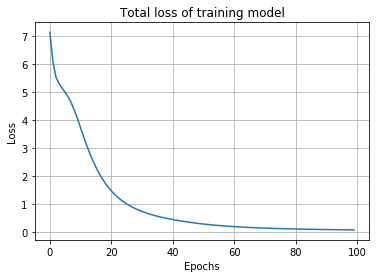

In [20]:
total_loss = train_network(network, dataset, num_outputs, learning_rate=0.5, num_epochs=100)
plot_network(total_loss)

Credits to: [machinelearningmastery.com](https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/)

---